In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [18]:
h08dir = '/home/kajiyama/H08/H08_20230612'
SUF = '.gl5'
tag = '.ln5'
dtype = 'float32'
gl5shape = (2160, 4320)
rgnshape = (36, 48)

# london region
left = -3
right = 1
bottom = 50
top = 53
upperindex = (90-top)*12
lowerindex = (90-bottom)*12
leftindex = (180+left)*12
rightindex = (180+right)*12
print(upperindex, lowerindex, leftindex, rightindex)

444 480 2124 2172


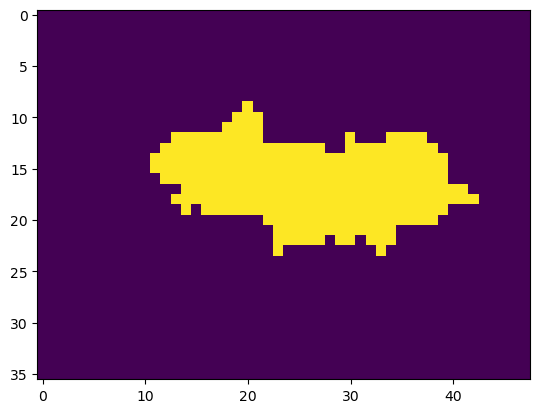

In [19]:
maskpath = h08dir + f'/map/dat/lnd_msk_/lndmsk.CAMA{tag}'
lndmsk = np.fromfile(maskpath, dtype=dtype).reshape(rgnshape)
plt.imshow(lndmsk)
plt.show()

In [25]:
# save the files
p0mis = 0

save_flag = False
if save_flag is True:
    loadfile = f"{h08dir}/map/out/riv_nxl_/rivnxl.CAMA{SUF}"
    savefile = f"{h08dir}/map/out/riv_nxl_/masked{tag}.CAMA{SUF}"
    data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
    region = data[upperindex:lowerindex, leftindex:rightindex]
    region_masked = np.where(lndmsk==1, region, p0mis)
    masked = np.zeros(gl5shape)
    masked[upperindex:lowerindex, leftindex:rightindex] = region_masked
    plt.imshow(masked)
    masked.astype(np.float32).tofile(savefile)

In [11]:
# instead of prep_lnd_region.sh
rivseq_path = f"{h08dir}/map/out/riv_seq_/rivseq.CAMA{SUF}"
rivnum_path = f"{h08dir}/map/out/riv_num_/rivnum.CAMA{SUF}"
rivara_path = f"{h08dir}/map/out/riv_ara_/rivara.CAMA{SUF}"
rivnxd_path = f"{h08dir}/map/out/riv_nxd_/rivnxd.CAMA{SUF}"
rivmou_path = f"{h08dir}/map/out/riv_mou_/rivmou.CAMA{SUF}"
elevtn_path = f"{h08dir}/map/dat/elv_min_/elevtn.CAMA{SUF}"
path_list_load = [rivseq_path, rivnum_path, rivara_path, rivnxd_path, rivmou_path, elevtn_path]

rivseq_path = f"{h08dir}/map/out/riv_seq_/rivseq.CAMA{tag}"
rivnum_path = f"{h08dir}/map/out/riv_num_/rivnum.CAMA{tag}"
rivara_path = f"{h08dir}/map/out/riv_ara_/rivara.CAMA{tag}"
rivnxd_path = f"{h08dir}/map/out/riv_nxd_/rivnxd.CAMA{tag}"
rivmou_path = f"{h08dir}/map/out/riv_mou_/rivmou.CAMA{tag}"
elevtn_path = f"{h08dir}/map/dat/elv_min_/elevtn.CAMA{tag}"
path_list_save = [rivseq_path, rivnum_path, rivara_path, rivnxd_path, rivmou_path, elevtn_path]

In [12]:
# save the files
p0mis = 0

save_flag = False
if save_flag is True:
    for loadfile, savefile in zip(path_list_load, path_list_save):
        data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
        region = data[upperindex:lowerindex, leftindex:rightindex]
        region_masked = np.where(lndmsk==1, region, p0mis)
        region_masked.astype(np.float32).tofile(savefile)

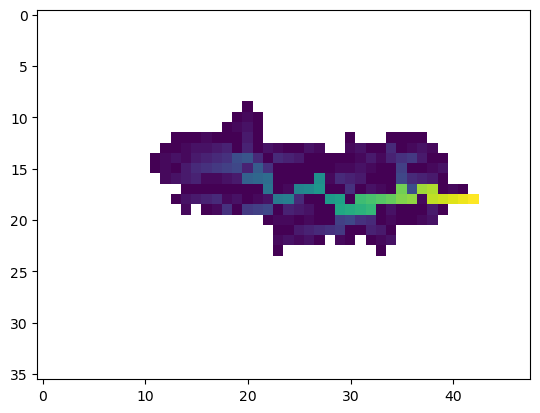

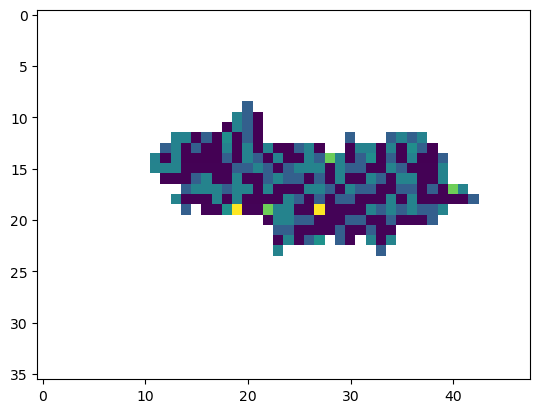

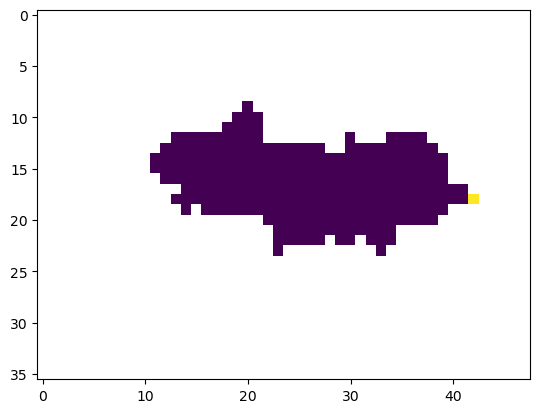

In [16]:
# view the files
tmppath = h08dir + f'/map/out/riv_seq_/rivseq.CAMA{tag}'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = h08dir + f'/map/out/riv_nxd_/rivnxd.CAMA{tag}'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = h08dir + f'/map/out/riv_mou_/rivmou.CAMA{tag}'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()